# Healthcare
#### Description

***Problem Statement***<br>
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**Project Task: Week 1**
Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv("F://SimpliLearn//Capstone Project//Project 2//Healthcare - Diabetes//health care diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above, we see that the minimum value of Glucose, Blood Pressure, Skin Thickness, Insulin and BMI have 0 as the minimum value. So these values are missing vaues which needs to be treated accordingly.

To see with what value these zeroes are to be replaced with,  we see the histogram distribution.

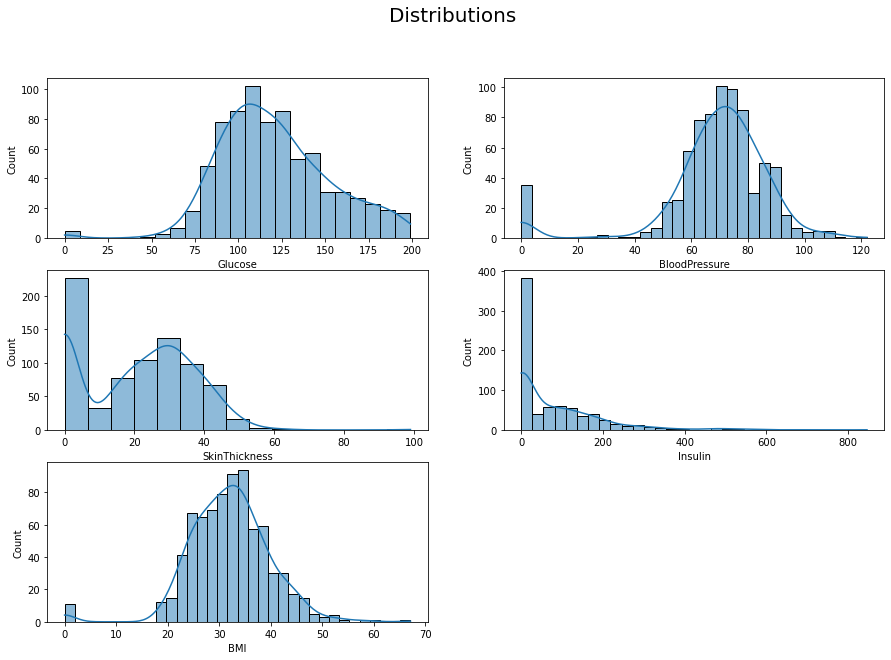

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.histplot(data=data, x='Glucose', kde=True)
plt.subplot(3,2,2)
sns.histplot(data=data, x='BloodPressure', kde=True)
plt.subplot(3,2,3)
sns.histplot(data=data, x='SkinThickness', kde=True)
plt.subplot(3,2,4)
sns.histplot(data=data, x='Insulin', kde=True)
plt.subplot(3,2,5)
sns.histplot(data=data, x='BMI', kde=True)

plt.suptitle('Distributions', fontsize=20)
plt.show()

We can see that Blood Pressure, BMI amd Glucose have almost normal distribution. For Insulin and Skin thickness the 0s affect the distribution to a great extent. Insulin is right skewed due to these zeroes.

For BMI, Blood Pressure and Glucose, we can replace the zeroes with mean, because it is a normal distribution. But we have to check the mean of these variables first. 

In [8]:
print('The mean of Gluscose is ', data['Glucose'].mean())
print('The mean of Blood Pressure is ', data['BloodPressure'].mean())
print('The mean of BMI is ', data['BMI'].mean())

The mean of Gluscose is  120.89453125
The mean of Blood Pressure is  69.10546875
The mean of BMI is  31.992578124999977


The mean value of Glucose is 120.89, which is above normal level and would term a person as prediabetic. Lets see first what the Glucose=0 people were classified as.

In [9]:
Glucose_check=data[data['Glucose']==0]
Glucose_check

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


We see that, three were classified as non-diabetic, two were classified as diabetic. The ones who were classified as diabetic have a higher BMI. So we would replace the Glucose= 0 level with 120.89 if BMI is greater than 32, else  with 90.

In [10]:
for i in data['BMI']:
    if i>32:
        data['Glucose']=data['Glucose'].replace(0, data['Glucose'].mean())
    else:
        data['Glucose']=data['Glucose'].replace(0, 90)

In [11]:
data['BloodPressure']=data['BloodPressure'].replace(0, data['BloodPressure'].mean())

In [12]:
BMI_check=data[data['BMI']==0]
BMI_check

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,0,0,0.0,0.232,54,1
49,7,105.0,69.105469,0,0,0.0,0.305,24,0
60,2,84.0,69.105469,0,0,0.0,0.304,21,0
81,2,74.0,69.105469,0,0,0.0,0.102,22,0
145,0,102.0,75.000000,23,0,0.0,0.572,21,0
371,0,118.0,64.000000,23,89,0.0,1.731,21,0
426,0,94.0,69.105469,0,0,0.0,0.256,25,0
494,3,80.0,69.105469,0,0,0.0,0.174,22,0
522,6,114.0,69.105469,0,0,0.0,0.189,26,0
684,5,136.0,82.000000,0,0,0.0,0.640,69,0


In [13]:
data['BMI']=data['BloodPressure'].replace(0, data['BloodPressure'].mean())

For Insulin and Skin thickness, the values the distribution is skewed due to 0s. Lets check the median and mode values.

In [14]:
print('The median of Insulin is ', data['Insulin'].median())
print('The mode of Insulin is ', data['Insulin'].mode())
print('The mean of Insulin is ', data['Insulin'].mean())
print('The median of Skin Thickness is ', data['SkinThickness'].median())
print('The mode of Skin Thickness is ', data['SkinThickness'].mode())
print('The mean of Skin Thickness is ', data['SkinThickness'].mean())

The median of Insulin is  30.5
The mode of Insulin is  0    0
dtype: int64
The mean of Insulin is  79.79947916666667
The median of Skin Thickness is  23.0
The mode of Skin Thickness is  0    0
dtype: int64
The mean of Skin Thickness is  20.536458333333332


We would replace the Insulin and Skin Thickness with median values.

In [15]:
data['Insulin']=data['Insulin'].replace(0, data['Insulin'].median())
data['SkinThickness']=data['SkinThickness'].replace(0, data['SkinThickness'].median())

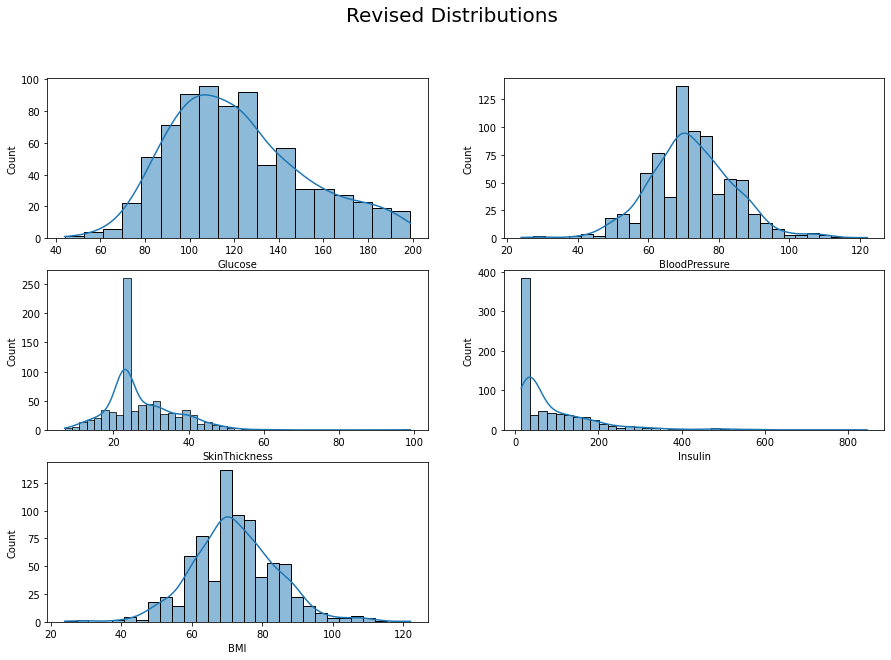

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.histplot(data=data, x='Glucose', kde=True)
plt.subplot(3,2,2)
sns.histplot(data=data, x='BloodPressure', kde=True)
plt.subplot(3,2,3)
sns.histplot(data=data, x='SkinThickness', kde=True)
plt.subplot(3,2,4)
sns.histplot(data=data, x='Insulin', kde=True)
plt.subplot(3,2,5)
sns.histplot(data=data, x='BMI', kde=True)

plt.suptitle('Revised Distributions', fontsize=20)
plt.show()

In [17]:
data.dtypes.values

array([dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('int64'), dtype('int64')], dtype=object)

In [18]:
data.dtypes.value_counts()

float64    5
int64      4
dtype: int64

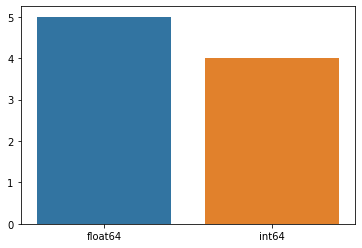

In [19]:
sns.barplot(x=['float64','int64'], y=data.dtypes.value_counts())
plt.show()

**Project Task: Week 2**
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

In [20]:
import warnings
warnings.filterwarnings('ignore')

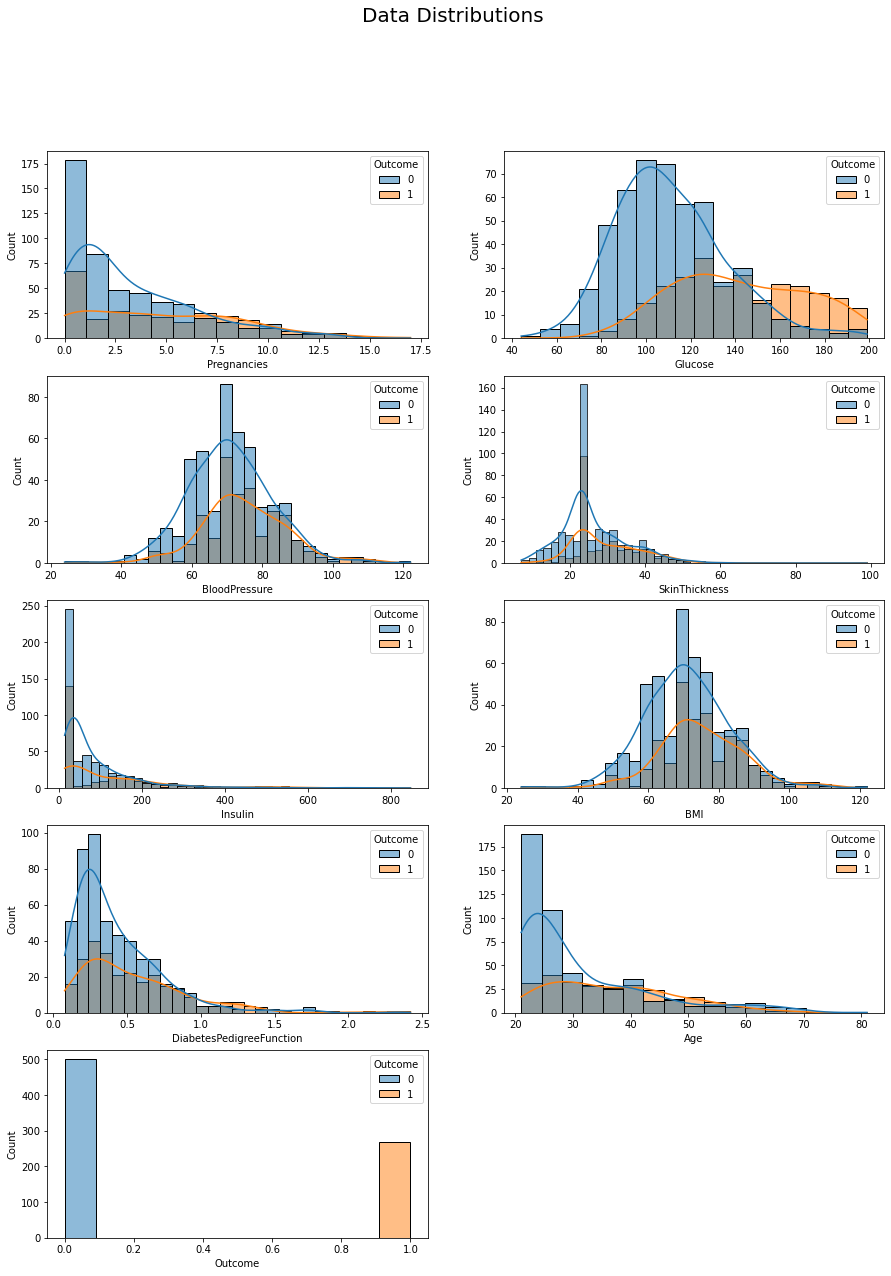

In [21]:
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.histplot(data=data, x='Pregnancies', kde=True, hue='Outcome')
plt.subplot(5,2,2)
sns.histplot(data=data, x='Glucose', kde=True, hue='Outcome')
plt.subplot(5,2,3)
sns.histplot(data=data, x='BloodPressure', kde=True, hue='Outcome')
plt.subplot(5,2,4)
sns.histplot(data=data, x='SkinThickness', kde=True, hue='Outcome')
plt.subplot(5,2,5)
sns.histplot(data=data, x='Insulin', kde=True, hue='Outcome')
plt.subplot(5,2,6)
sns.histplot(data=data, x='BMI', kde=True, hue='Outcome')
plt.subplot(5,2,7)
sns.histplot(data=data, x='DiabetesPedigreeFunction', kde=True, hue='Outcome')
plt.subplot(5,2,8)
sns.histplot(data=data, x='Age', kde=True, hue='Outcome')
plt.subplot(5,2,9)
sns.histplot(data=data, x='Outcome', kde=True, hue='Outcome')

plt.suptitle('Data Distributions', fontsize=20)
plt.show()

From the above graphs, we infer the following:
1. Most of the people have had no pregnancy or single pregnancy history.
2. The Glucose follows a normal distribution. Mostly lies in the range of 90 to 110. So many people are just at the normal upper limit of glucose level. With increasing glucose level, the probability of person being diabetic increases.
3. The Blood Pressure also follows a normal distribution. Most of the people have a normal blood pressure level. The diabetic probability cannot be clearly correlated with blood pressure levels.
4. For high BMI, the ratio of diabetic people is comparatively more as that of low BMI.
5. With age, the probability of a person having diabetes increases.
6. The dataset contains more cases of non-diabetic outcome than diabetic outcome.

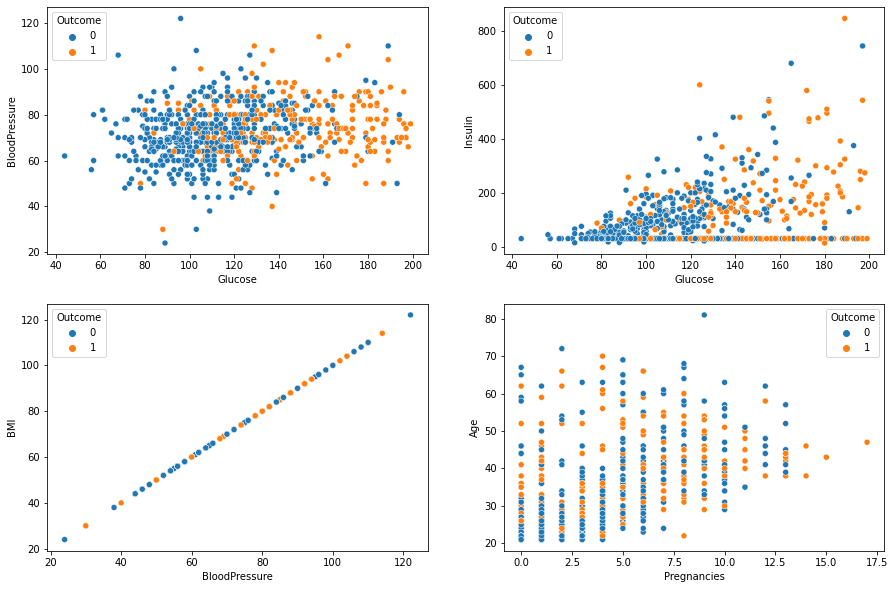

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=data)
plt.subplot(2,2,2)
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=data)
plt.subplot(2,2,3)
sns.scatterplot(x='BloodPressure', y='BMI', hue='Outcome', data=data)
plt.subplot(2,2,4)
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data)
plt.show()

<Figure size 1080x720 with 0 Axes>

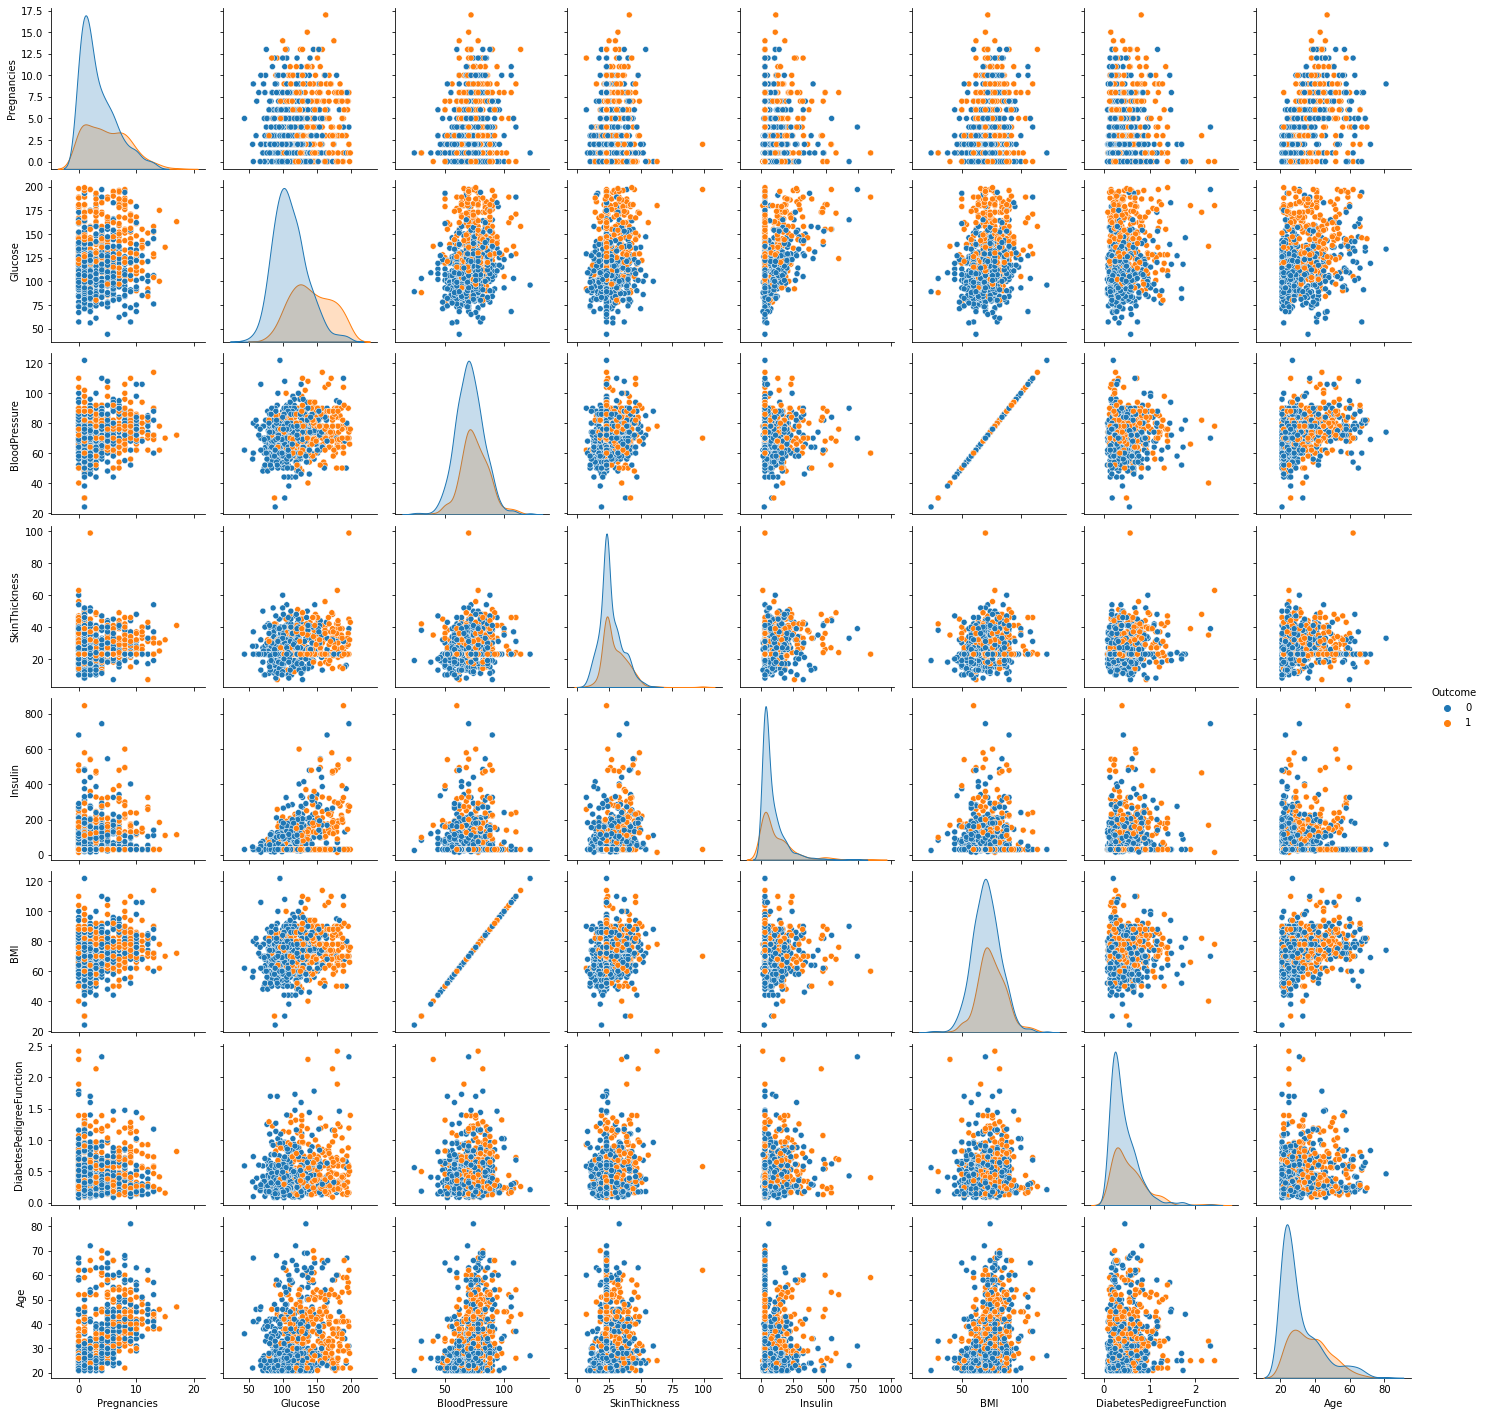

In [23]:
plt.figure(figsize=(15,10))
sns.pairplot(data=data, hue='Outcome')
plt.show()

1. We can see that, Glucose has a clear correlation with the outcome. High Glucose level is anj indicator that the person is diabetic.
2. Blood Pressure and BMI has a direct positive correlation. It is a perfectly linear correlation. With increasing BMI, the Blood pressure increases. Although whether a person is diabetic or not cannot be clearly stated.
3. Glucose and Insulin are also positively correlated. With increasing glucose level, the Insulin level also increases in many cases and so does the diabetic probability.
4. Diabetes Pedigree Function vs BMI is almost a normal distribution with Diabetic probability increasing with BMI.
5. With Pregnancies, the Insulin decreases and there is a negative correlation. The chances of a person being Diabetic increases with number of pregnancies.

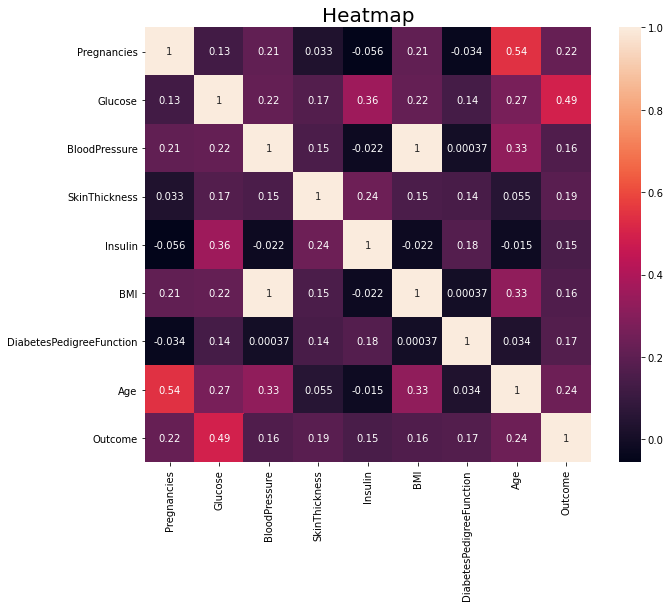

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.title('Heatmap', fontsize=20)
plt.show()

We can see that, Glucose is the best predictor for the outcome. It is followed by Age and Pregnancies.

**Project Task: Week 3**
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [25]:
X=data.drop('Outcome', axis=1)
y=data.pop('Outcome')

In [26]:
X.shape

(768, 8)

In [27]:
y.shape

(768,)

We would try to compare various models with the KNN algorithm. Number of variables is only 8. Some have interdependencies as well. For example, BMI and the Blood pressure are directly correlated. So 

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=23)

In [30]:
print('X_train shape=', X_train.shape)
print('X_test shape=', X_test.shape)
print('y_train shape=', y_train.shape)
print('y_test shape=', y_test.shape)

X_train shape= (614, 8)
X_test shape= (154, 8)
y_train shape= (614,)
y_test shape= (154,)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
C1KNN=KNeighborsClassifier()
C1KNN.fit(X_train,y_train)
score_C1KNN=C1KNN.score(X_test,y_test)
print('KNN Classifier score is',score_C1KNN)

KNN Classifier score is 0.7142857142857143


In [32]:
from sklearn.tree import DecisionTreeClassifier
C2DT=DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2)
C2DT.fit(X_train,y_train)
score_C2DT=C2DT.score(X_test,y_test)
print('Decision Tree Classifier score is', score_C2DT)

Decision Tree Classifier score is 0.7272727272727273


In [33]:
from sklearn.linear_model import LogisticRegression
C3LR=LogisticRegression()
C3LR.fit(X_train,y_train)
score_C3LR=C3LR.score(X_test,y_test)
print('Logistic Regression Classifier score is', score_C3LR)

Logistic Regression Classifier score is 0.7857142857142857


In [34]:
from sklearn.naive_bayes import GaussianNB 
C4GNB=GaussianNB()
C4GNB.fit(X_train,y_train)
score_C4GNB=C4GNB.score(X_test,y_test)
print('Gaussian Naive Bayes Classifier score is', score_C4GNB)

Gaussian Naive Bayes Classifier score is 0.7727272727272727


In [35]:
from sklearn.svm import SVC
C5SVM=SVC(kernel='linear', gamma=1, probability=True)
C5SVM.fit(X_train,y_train)
score_C5SVM=C5SVM.score(X_test,y_test)
print('SVM Classifier score is', score_C5SVM)

SVM Classifier score is 0.8116883116883117


Of all the classification models, SVM gives the best results. KNN gives the least scores in comparison to other models.

**Project Task: Week 4**

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
C1KNN_predict=C1KNN.predict(X_test)
C2DT_predict=C2DT.predict(X_test)
C3LR_predict=C3LR.predict(X_test)
C4GNB_predict=C4GNB.predict(X_test)
C5SVM_predict=C5SVM.predict(X_test)

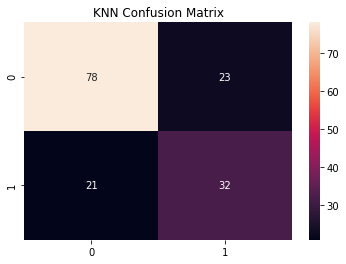

In [38]:
KNN_cm=confusion_matrix(y_test,C1KNN_predict)
sns.heatmap(KNN_cm, annot=True)
plt.title('KNN Confusion Matrix')
plt.show()

In [39]:
knn_sensitivity=78/(78+21)
knn_specificity=32/(32+23)
print('Sensitivity of KNN model =', knn_sensitivity)
print('Specificity of KNN model =', knn_specificity)

Sensitivity of KNN model = 0.7878787878787878
Specificity of KNN model = 0.5818181818181818


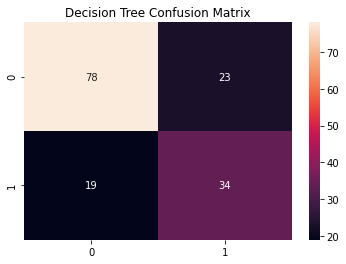

In [40]:
DT_cm=confusion_matrix(y_test,C2DT_predict)
sns.heatmap(DT_cm, annot=True)
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [41]:
dt_sensitivity=75/(75+19)
dt_specificity=34/(34+26)
print('Sensitivity of Decision Tree model =', dt_sensitivity)
print('Specificity of Decision Tree model =', dt_specificity)

Sensitivity of Decision Tree model = 0.7978723404255319
Specificity of Decision Tree model = 0.5666666666666667


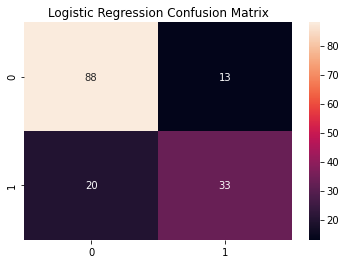

In [42]:
LR_cm=confusion_matrix(y_test,C3LR_predict)
sns.heatmap(LR_cm, annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [43]:
lr_sensitivity=88/(88+20)
lr_specificity=33/(33+13)
print('Sensitivity of Logistic Regression model =', lr_sensitivity)
print('Specificity of Logistic Regression model =', lr_specificity)

Sensitivity of Logistic Regression model = 0.8148148148148148
Specificity of Logistic Regression model = 0.717391304347826


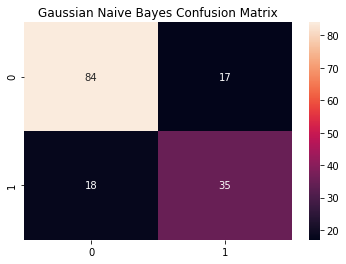

In [44]:
GNB_cm=confusion_matrix(y_test,C4GNB_predict)
sns.heatmap(GNB_cm, annot=True)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

In [45]:
gnb_sensitivity=84/(84+18)
gnb_specificity=35/(35+17)
print('Sensitivity of Naive Bayes model =', gnb_sensitivity)
print('Specificity of Naive Bayes model =', gnb_specificity)

Sensitivity of Naive Bayes model = 0.8235294117647058
Specificity of Naive Bayes model = 0.6730769230769231


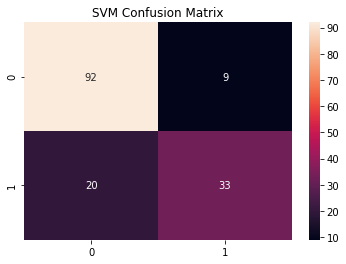

In [46]:
SVM_cm=confusion_matrix(y_test,C5SVM_predict)
sns.heatmap(SVM_cm, annot=True)
plt.title('SVM Confusion Matrix')
plt.show()

In [47]:
svm_sensitivity=92/(92+20)
svm_specificity=33/(33+9)
print('Sensitivity of SVM model =', svm_sensitivity)
print('Specificity of SVM model =', svm_specificity)

Sensitivity of SVM model = 0.8214285714285714
Specificity of SVM model = 0.7857142857142857


We see that, Naive Bayes has the highest sensitivity. But it has a very low specificity. On the other hand, SVM has a high specificity and its sensitivity is high as well.

In [48]:
knn_pred_prob=C1KNN.predict_proba(X_test)
dt_pred_prob=C2DT.predict_proba(X_test)
lr_pred_prob=C3LR.predict_proba(X_test)
gnb_pred_prob=C4GNB.predict_proba(X_test)
svm_pred_prob=C5SVM.predict_proba(X_test)

In [49]:
knn_pred_prob=knn_pred_prob[:,1]
dt_pred_prob=dt_pred_prob[:,1]
lr_pred_prob=lr_pred_prob[:,1]
gnb_pred_prob=gnb_pred_prob[:,1]
svm_pred_prob=svm_pred_prob[:,1]

In [50]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [51]:
knn_auc=roc_auc_score(y_test,knn_pred_prob)
dt_auc=roc_auc_score(y_test,dt_pred_prob)
lr_auc=roc_auc_score(y_test,lr_pred_prob)
gnb_auc=roc_auc_score(y_test,gnb_pred_prob)
svm_auc=roc_auc_score(y_test,svm_pred_prob)

In [52]:
knn_fpr, knn_tpr, _ =roc_curve(y_test, knn_pred_prob)
dt_fpr, dt_tpr, _ =roc_curve(y_test, dt_pred_prob)
lr_fpr, lr_tpr, _ =roc_curve(y_test, lr_pred_prob)
gnb_fpr, gnb_tpr, _ =roc_curve(y_test, gnb_pred_prob)
svm_fpr, svm_tpr, _ =roc_curve(y_test, svm_pred_prob)

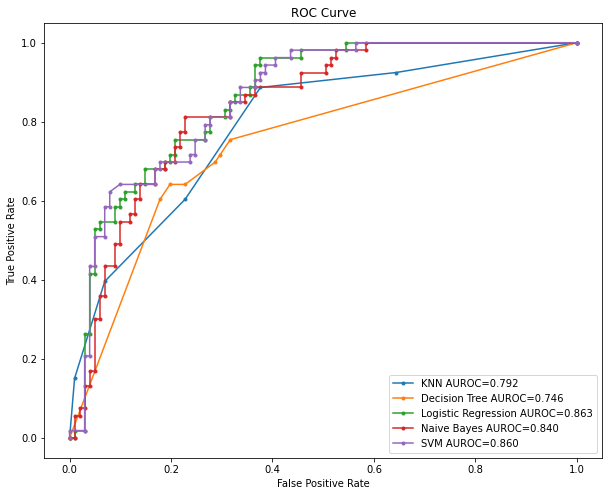

In [53]:
plt.figure(figsize=(10,8))
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN AUROC=%0.3f' %knn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree AUROC=%0.3f' %dt_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression AUROC=%0.3f' %lr_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Naive Bayes AUROC=%0.3f' %gnb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM AUROC=%0.3f' %svm_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')
plt.legend()
plt.show()

ROC or the Receiver Operator Characteristic graphs gives a simplified view to summarize the various classification models. It gives an idea of how changing the threshold changes the sensitivity or the True positive rate and the False positive rate (1-specificity). The area under the curve (AUC) tells that which model performs better. Higher the AUC, better is the model performance. Here, we see that SVM and Logistic Regression has high AUC.They both have high accuracy scores. So these models are best for this classification problem. Other models can b improved by changing the parameters.